# Meteorite landings analyse
This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings from 860 to 2013.

This dataset was downloaded from the NASA site dedicated to open data at the address: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [519]:
df = pd.read_csv("meteorite_ds.csv")

## Quick dataset exploration

In [520]:
df.shape

(45716, 10)

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [522]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


- name : Name of the meteorite, usually attached to the place where it was found

- id : Meteorite ID

- nametype : 'valid' or 'relict'. 'valid' are for meteorites that have retained enough integrity to be clearly classified. 'relict' for objects that were once meteorites but are now highly altered by weathering on Earth

- recclass : Classification of the meteorite (according to its chemical and mineralogical composition)

- mass (g) : Mass in grams

- fall : 'fell' or 'found'. 'fell' for meteorites whose fall has been observed/verified. 'found' for found meteorites

- year : Year the meteorite was first found/studied

- reclat : Latitude of the meteorite

- reclong : Longitude of the meteorite

- GeoLocation : Latitude and longitude in tuple

### A data dating back more than a millennium and... another recorded in the future
#### The oldest

In [523]:
# Minimum year
df['year'].min()

860.0

In [524]:
df.loc[df['year'] == 860.0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.725,130.75,"(33.725, 130.75)"


This meteorite is the oldest ever recorded and this thanks to the stories of the time faithfully transmitted through the generations. She had indeed fallen on May 19, 861 in Nogata in Japan in the middle of a Shinto shrine whose faithful have decided to keep

#### The most futuristic
A meteorite seems to have been recorded during the year 2101...

In [525]:
# Maximum year
df['year'].max()

2101.0

In [526]:
df.loc[df['year'] == 2101.0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


This seems to be a mistake (maybe it was 2010 or 2001), but for the most superstitious, this meteorite should only weigh 55 grams. 

We also notice that the geographical coordinates of this entry do not seem to have been specified, there are certainly other entries in the dataset with this particularity, it will be necessary to decide what to do with them during the next step of data cleaning.

#### The heaviest

In [527]:
df['mass (g)'].max()

60000000.0

In [528]:
df.loc[df['mass (g)'] == 60000000]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)"


From its 60 tons, it is the heaviest and most imposing meteorite ever recorded, it is in Namibia in a farm called Hoba. Scientists estimate that its fall dates back more than 80,000 years, but it was first studied and classified in 1920. Despite its colossal mass, it would not have left any apparent crater, supposedly due to the atmosphere. which would have slowed it down enough, helped by its rectilinear forms.

# Data cleaning

## Delete rows with missing/imprecise data
In order to compose only with complete data we choose to delete the rows of the dataframe including missing data

In [529]:
# The raw dataframe has : 
# 45716 rows and 10 columns
shape_before = df.shape
shape_before

(45716, 10)

In [530]:
def del_count(shape):
    """ Function to calculate the amount of information deleted after each cleaning """
    rows_before = shape_before[0]
    rows_now = shape[0]
    cumul_del = rows_before - rows_now
    #print(rows_before, rows_now)
    perc_del = round((cumul_del / rows_before) * 100, 2)

    out = f"Rows initially : {rows_before} | Rows now : {rows_now} | Rows deleted : {cumul_del} - ({perc_del}%)"

    return out

### NaN data
Some data in the dataset has empty elements (NaN), we choose to delete them

In [531]:
df[df.isna().any(axis=1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


In [532]:
# Delete all rows with at least one missing data
df = df.dropna()

In [533]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 38115 | Rows deleted : 7601 - (16.63%)'

This operation caused us to lose more than 16% of the data in the dataset (which is significant) but in return we have the assurance of having complete data on which to rely.

### Quantity per year

In [534]:
# How many occurences by year ?
years_val = df['year'].value_counts()
years_val

1979.0    3045
1988.0    2295
1998.0    2147
2003.0    1754
2006.0    1616
          ... 
1583.0       1
1723.0       1
1740.0       1
1833.0       1
1792.0       1
Name: year, Length: 253, dtype: int64

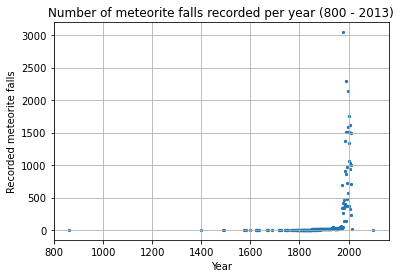

In [535]:
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 5)
plt.title('Number of meteorite falls recorded per year (800 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

The graph above reveals that almost all of the data recorded are between the years 1600 and 2000 (with a significant peak from the 80s, certainly due to the growing popularity of computers in the field of scientific research). Of course, this doesn't mean that meteorites falls were particulary numerous during this period : according to NASA, an average of 84,000 meteorites crash into the earth each year, but most of them go unnoticed (85 to 90% fall into the ocean). It's therefore possible to think that in each year of this dataset the same average quantity of meteorites crashed.

Thus, in order to take advantage of a greater density of information and to work on annual quantities of meteorites as close as possible to reality, we have chosen to deal only with data spanning from 1970 to 2013

In [536]:
# We only retain data recorded between 1970 and 2013
df = df.loc[(df['year'] >= 1970) & (df['year'] <= 2013)]

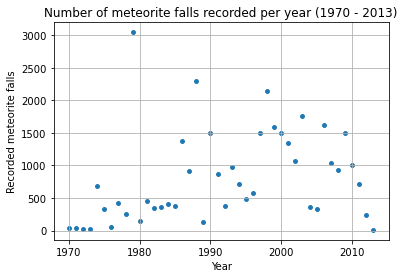

In [537]:
years_val = df['year'].value_counts()
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 15)
plt.title('Number of meteorite falls recorded per year (1970 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

In [538]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 35901 | Rows deleted : 9815 - (21.47%)'

### Mass

Text(0.5, 1.0, 'Meteorite falls recorded per mass (mg)')

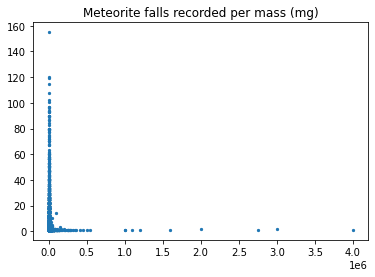

In [539]:
mass_val = df['mass (g)'].value_counts()
x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 5)
plt.title("Meteorite falls recorded per mass (mg)")

In [540]:
df['mass (g)'].describe().round(2)

count      35901.00
mean        1483.01
std        40823.51
min            0.00
25%            6.10
50%           24.80
75%          133.10
max      4000000.00
Name: mass (g), dtype: float64

Meteorites have been rocorded with a weight of 0 grams

In [541]:
# There are a total of 19 entries listing a meteorite at 0 grams
df[df['mass (g)'] == 0].shape[0]

19

In [542]:
# We choose to delete these rows, keeping only the rows wih a weight strictly greater than 0 grams
df = df.loc[df['mass (g)'] > 0]

In [543]:
# Total rows deleted
del_count(df.shape)

'Rows initially : 45716 | Rows now : 35882 | Rows deleted : 9834 - (21.51%)'

Text(0, 0.5, 'Quantity counted')

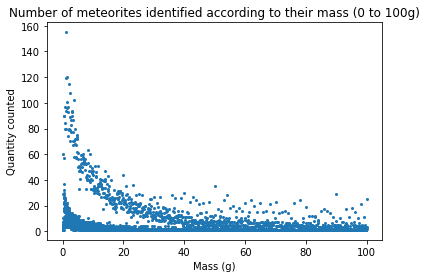

In [544]:
df_mass = df.loc[(df['mass (g)'] > 0) & (df['mass (g)'] <= 100)]
mass_val = df_mass['mass (g)'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass (0 to 100g)')
plt.xlabel('Mass (g)')
plt.ylabel('Quantity counted')

If you zoom in from 0 to 100 grams, you can clearly see two converging lines appear. Some points appear to overlap on this scale (which would be illogical) but are actually shifted by a few tenths of a gram, an imperceptible difference on this scale. Zooming in more will allow us to see more clearly (next figure)

Text(0, 0.5, 'Quantity counted')

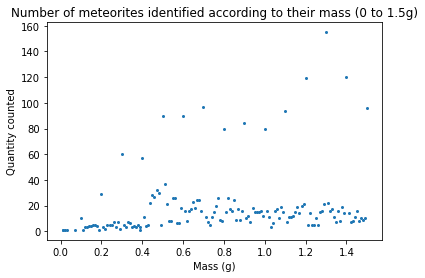

In [545]:
df_mass = df.loc[(df['mass (g)'] > 0) & (df['mass (g)'] <= 1.5)]
mass_val = df_mass['mass (g)'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass (0 to 1.5g)')
plt.xlabel('Mass (g)')
plt.ylabel('Quantity counted')

The interval from 0 to 1.5 gram confirms that no point overlaps, but how to explain the existence of these 2 lines observed in the previous figure? 

We can hypothesize that some measuring devices were not sensitive enough for such low weights and that a large majority of these values were rounded off. Witness the large quantities of meteorites recorded with a weight of 0.1, 0.2, 0.3, 0.4, 0.5, ... intermediate values being rarer. The convergence of the lines can thus be explained by the increasing weight of the meteorites allowing most measuring devices to give more precise values.

### Location

<AxesSubplot:title={'center':'Geographic visualisation'}, xlabel='reclong', ylabel='reclat'>

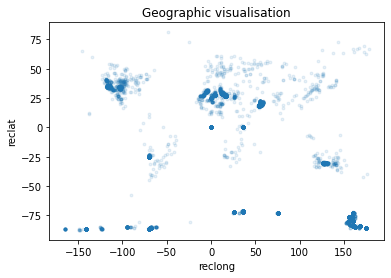

In [546]:
df.plot(kind='scatter', x='reclong', y='reclat', alpha=0.1, s=8, title='Geographic visualisation')

We notice that there is a concentration of points at the coordinates (0, 0), which happens to be in the middle of the Gulf of Guinea in the Atlantic Ocean, this seems to be representations of data whose location has not been specified (equivalent to NaN). We choose to remove this data from the dataset.

In [547]:
# 6183 entries have no precise locations
df.loc[(df['reclat'] == 0.0) & (df['reclong'] == 0.0)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
597,Mason Gully,53653,Valid,H5,24.54,Fell,2010.0,0.0,0.0,"(0.0, 0.0)"
1655,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1656,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1657,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1658,Allan Hills 09008,55799,Valid,H5,31.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
45655,Yamato 984144,40764,Valid,H6,37.44,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45656,Yamato 984145,40765,Valid,L6,54.80,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45657,Yamato 984146,40766,Valid,H3,19.32,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45658,Yamato 984147,40767,Valid,LL6,118.90,Found,1998.0,0.0,0.0,"(0.0, 0.0)"


In [548]:
df = df.loc[(df['reclat'] != 0.0) & (df['reclong'] != 0.0)]

<AxesSubplot:title={'center':'Geographic visualisation (without (0,0) coord.)'}, xlabel='reclong', ylabel='reclat'>

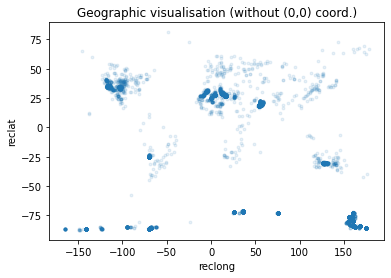

In [549]:
df.plot(kind='scatter', x='reclong', y='reclat', alpha=0.1, s=8, title='Geographic visualisation (without (0,0) coord.)')

In [550]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 29476 | Rows deleted : 16240 - (35.52%)'

In [551]:
# Deleted rows broke the linearity of the index, so it needs to be reset
df = df.reset_index(drop=True)

In [552]:
recclass = df['recclass'].value_counts()
recclass

L6                6165
H5                5274
H4                3176
H6                2921
L5                2607
                  ... 
EL4/5                1
Diogenite-an         1
CR1                  1
L(LL)3.5-3.7         1
Mesosiderite-C       1
Name: recclass, Length: 361, dtype: int64

In [553]:
total = recclass.sum()

In [554]:
recclass_high = recclass[recclass >= 500]
others_count = recclass.sum() - recclass_high.sum()

In [555]:
recclass_high

L6     6165
H5     5274
H4     3176
H6     2921
L5     2607
LL5    1877
LL6     925
L4      749
Name: recclass, dtype: int64

In [556]:
others_series = pd.Series([others_count], index=['Others'])
recclass_high = recclass_high.append(others_series)
recclass_high

C:\Users\diego\AppData\Local\Temp\ipykernel_17900\3087247061.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recclass_high = recclass_high.append(others_series)


L6        6165
H5        5274
H4        3176
H6        2921
L5        2607
LL5       1877
LL6        925
L4         749
Others    5782
dtype: int64

In [557]:
x = np.array(recclass_high.keys())
y = recclass_high.values

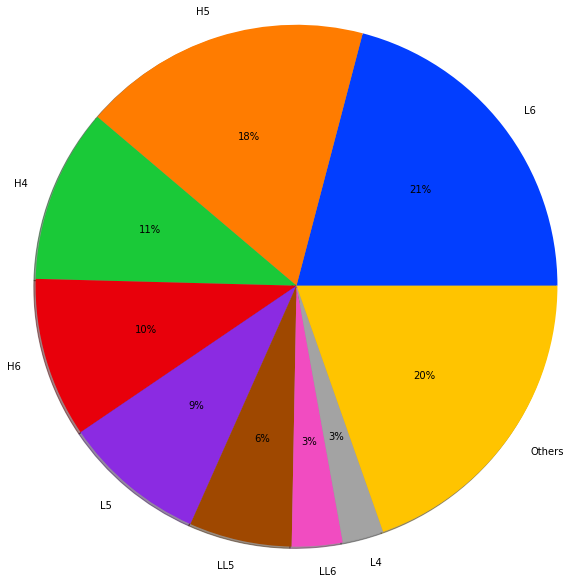

In [558]:
pal_color = sns.color_palette('bright')
title = 'Meteorites distribution by their classification'

plt.pie(y, labels=x, colors=pal_color, autopct='%.0f%%', radius=3, shadow=True)
#plt.title(title)
plt.show()

In [559]:
df_h6 = df.loc[df['recclass'] == 'H6']
df_l6 = df.loc[df['recclass'] == 'L6']

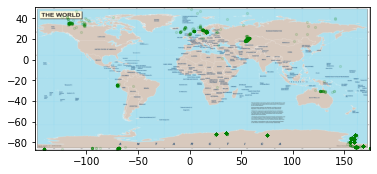

In [560]:
x_axis = df_h6['reclong']
y_axis = df_h6['reclat']

a = df_l6['reclong']
b = df_l6['reclat']

img = plt.imread('world_map_2.png')
fig, ax = plt.subplots()

#ax.imshow(img, extent=[-150, 180, -100, 70])
ax.imshow(img, extent=[x_axis.min(), x_axis.max(), y_axis.min(), y_axis.max()])
ax.scatter(x_axis, y_axis, s=5, alpha=0.1, color='green')
#ax.scatter(a, b, s=5, alpha=0.1, color='red')

#plt.imshow(img)
#df_h6.plot(kind='scatter', x='reclong', y='reclat', alpha=0.1, s=8, title='Geographic visualisation')